Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    pass

In [0]:
import pandas as pd

# Data originally from: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction
train = pd.read_csv("https://raw.githubusercontent.com/BuildABuddha/DS-Unit-2-Applied-Modeling/master/data/airline-satisfaction/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/BuildABuddha/DS-Unit-2-Applied-Modeling/master/data/airline-satisfaction/test.csv")

Your code starts here:

In [38]:
from sklearn.model_selection import train_test_split

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['satisfaction'], random_state=42)

train.shape, val.shape, test.shape

((83123, 25), (20781, 25), (25976, 25))

In [39]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
30633,30633,107529,Female,Loyal Customer,47,Business travel,Business,1521,3,3,3,3,5,4,5,4,4,4,4,4,4,3,0,0.0,satisfied
98857,98857,129312,Male,disloyal Customer,35,Business travel,Business,2586,3,3,3,4,3,3,5,3,5,5,5,5,4,3,0,0.0,neutral or dissatisfied
80498,80498,42352,Female,Loyal Customer,66,Personal Travel,Eco,550,2,4,2,2,5,4,5,4,4,2,4,3,4,5,78,82.0,neutral or dissatisfied
73981,73981,33349,Male,disloyal Customer,26,Business travel,Eco,1269,5,4,4,1,3,5,3,3,5,1,5,3,4,3,0,0.0,satisfied
70633,70633,92993,Male,Loyal Customer,48,Personal Travel,Eco,738,1,5,0,2,4,0,4,4,5,2,4,3,5,4,64,49.0,neutral or dissatisfied


In [0]:
def wrangle(X):
    X = X.copy()

    # These columns are either useless data or variables we shouldn't use.
    unwanted_columns = ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
                        'Type of Travel', 'Class', 'Flight Distance']

    for column in unwanted_columns:
        X = X.drop(column, axis=1)
    
    # Replace NA values in this column with zero. 
    X['Arrival Delay in Minutes'] = X['Arrival Delay in Minutes'].fillna(0)

    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [41]:
from sklearn.metrics import accuracy_score

# Get mean baseline score:
majority_class = train['satisfaction'].mode()[0]
y_pred = [majority_class] * len(train['satisfaction'])

accuracy_score(train['satisfaction'], y_pred)

0.566666265654512

In [42]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

target = 'satisfaction'
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestClassifier(random_state=0, n_jobs=-2, n_estimators=500)
    )

pipeline.fit(X_train, y_train)

print(pipeline.score(val[features], val[target]))

0.9468745488667533


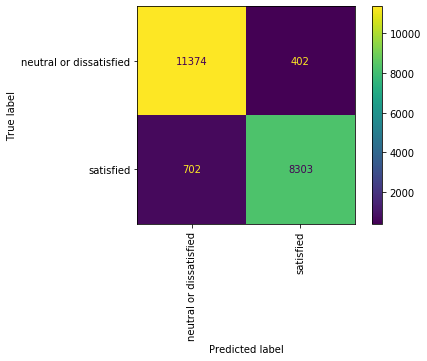

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, val[features], val[target], values_format='.0f', xticks_rotation='vertical');

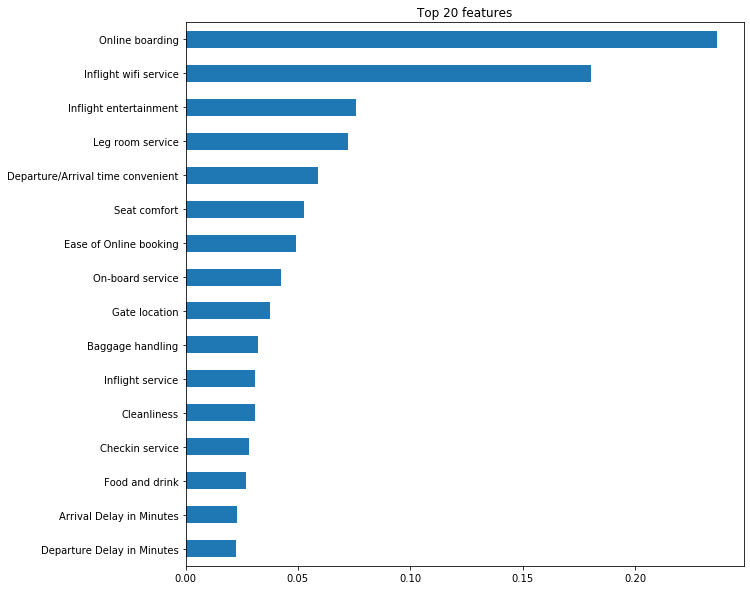

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(train[features])

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [45]:
print(pipeline.score(test[features], test[target]))

0.9462580843855867
